# SINDy-SHRED Tutorial on Sea Surface Temperature (SHRED V1)

In [1]:
%load_ext autoreload
%autoreload 2

#### Import Libraries

In [2]:
# PYSHRED
from pyshred import DataManager, SHRED, SHREDEngine, SINDy_Forecaster

# Other helper libraries
import matplotlib.pyplot as plt
from scipy.io import loadmat
import torch
import numpy as np

#### Load in SST Data

In [3]:
mat = loadmat("SST_data.mat")
sst_data = mat['Z'].T
sst_data = sst_data.reshape(1400, 180, 360)
sst_data.shape

(1400, 180, 360)

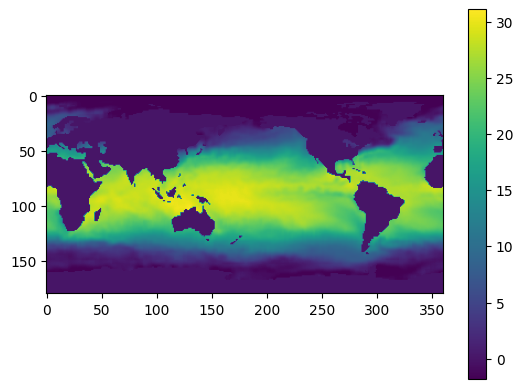

In [4]:
# Plotting a single frame
plt.figure()
plt.imshow(sst_data[0]) 
plt.colorbar()
plt.show()

#### Initialize Data Manager

In [5]:
manager = DataManager(
    lags = 52,
    train_size = 0.8,
    val_size = 0.1,
    test_size = 0.1,
)

#### Add datasets and sensors

In [6]:
manager.add_data(
    data = sst_data,
    id = "SST",
    random = 50,
    # mobile=,
    # stationary=,
    # measurements=,
    compress=False,
)

#### Analyze sensor summary

In [7]:
manager.sensor_summary_df

,data id,number,type,loc/traj
0,SST,0,stationary (random),"(15, 11)"
1,SST,1,stationary (random),"(50, 232)"
2,SST,2,stationary (random),"(144, 152)"
3,SST,3,stationary (random),"(100, 153)"
4,SST,4,stationary (random),"(86, 146)"
5,SST,5,stationary (random),"(94, 164)"
6,SST,6,stationary (random),"(58, 294)"
7,SST,7,stationary (random),"(145, 200)"
8,SST,8,stationary (random),"(132, 48)"
9,SST,9,stationary (random),"(150, 22)"


In [8]:
manager.sensor_measurements_df

data id,SST-0,SST-1,SST-2,SST-3,SST-4,SST-5,SST-6,SST-7,SST-8,SST-9,...,SST-40,SST-41,SST-42,SST-43,SST-44,SST-45,SST-46,SST-47,SST-48,SST-49
0,1.10,12.90,5.64,28.469999,29.039999,29.859999,20.850000,6.71,11.95,0.01,...,-0.0,0.0,-0.0,10.62,20.89,0.0,0.0,0.0,0.0,27.339999
1,0.76,13.03,6.12,29.769999,29.449999,29.769999,21.210000,6.93,12.33,0.67,...,-0.0,0.0,-0.0,10.42,20.74,0.0,0.0,0.0,0.0,27.409999
2,0.60,12.82,6.25,29.829999,29.659999,30.729999,21.070000,7.21,13.12,1.22,...,-0.0,0.0,-0.0,9.93,21.20,0.0,0.0,0.0,0.0,27.249999
3,0.70,12.45,6.16,29.409999,29.329999,29.859999,21.190000,7.24,13.56,1.26,...,-0.0,0.0,-0.0,9.54,21.07,0.0,0.0,0.0,0.0,27.289999
4,1.07,12.00,6.09,28.139999,29.049999,29.229999,21.240000,7.00,13.39,1.26,...,-0.0,0.0,-0.0,9.05,21.75,0.0,0.0,0.0,0.0,26.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,8.22,17.20,5.10,27.909999,30.449999,30.309999,28.399999,2.68,6.43,-1.64,...,-0.0,0.0,-0.0,18.92,18.89,0.0,0.0,0.0,0.0,29.289999
1396,7.71,17.44,5.41,28.109999,30.649999,30.429999,27.969999,3.01,6.34,-1.68,...,-0.0,0.0,-0.0,18.44,18.73,0.0,0.0,0.0,0.0,29.409999
1397,7.01,17.86,4.80,28.439999,30.809999,30.499999,27.129999,3.41,7.39,-1.76,...,-0.0,0.0,-0.0,17.34,18.65,0.0,0.0,0.0,0.0,29.709999
1398,6.85,17.40,5.21,28.619999,30.749999,30.499999,25.839999,3.64,7.16,-1.78,...,-0.0,0.0,-0.0,15.27,19.23,0.0,0.0,0.0,0.0,29.469999


#### Get train, validation, and test set

In [9]:
train_dataset, val_dataset, test_dataset= manager.prepare()

#### Initialize a latent forecaster

In [10]:
latent_forecaster = SINDy_Forecaster(poly_order=1, include_sine=True, dt=1/5)

#### Initialize SHRED

In [11]:
shred = SHRED(sequence_model="GRU", decoder_model="SDN", latent_forecaster=latent_forecaster)

#### Fit SHRED

In [12]:
val_errors = shred.fit(train_dataset=train_dataset, val_dataset=val_dataset, num_epochs=10, thres_epoch=20, sindy_regularization=1)
print('val_errors:', val_errors)

Fitting SindySHRED...
Epoch 1: Average training loss = 0.076958
Validation MSE (epoch 1): 0.030490
Epoch 2: Average training loss = 0.029100
Validation MSE (epoch 2): 0.016114
Epoch 3: Average training loss = 0.023207
Validation MSE (epoch 3): 0.014191
Epoch 4: Average training loss = 0.021703
Validation MSE (epoch 4): 0.013448
Epoch 5: Average training loss = 0.020463
Validation MSE (epoch 5): 0.012565
Epoch 6: Average training loss = 0.019775
Validation MSE (epoch 6): 0.012231
Epoch 7: Average training loss = 0.018983
Validation MSE (epoch 7): 0.011816
Epoch 8: Average training loss = 0.018366
Validation MSE (epoch 8): 0.011647
Epoch 9: Average training loss = 0.018085
Validation MSE (epoch 9): 0.011208
Epoch 10: Average training loss = 0.017641
Validation MSE (epoch 10): 0.010982
val_errors: [0.03048987 0.01611437 0.01419062 0.01344803 0.01256491 0.0122308
 0.01181625 0.01164673 0.01120763 0.01098171]


#### Evaluate SHRED

In [13]:
train_mse = shred.evaluate(dataset=train_dataset)
val_mse = shred.evaluate(dataset=val_dataset)
test_mse = shred.evaluate(dataset=test_dataset)
print(f"Train MSE: {train_mse:.3f}")
print(f"Val   MSE: {val_mse:.3f}")
print(f"Test  MSE: {test_mse:.3f}")

Train MSE: 0.009
Val   MSE: 0.011
Test  MSE: 0.014


#### SINDy Discovered Latent Dynamics

In [14]:
shred.latent_forecaster.model.print()

(x0)' = 0.681 1 + 0.284 x0 + 0.677 x1 + 1.324 x2
(x1)' = -0.163 1 + -0.325 x0 + -0.281 x1 + -0.505 x2
(x2)' = -0.195 1 + -0.037 x0 + 0.049 x1 + -0.220 x2


#### Initialize SHRED Engine for Downstream Tasks

In [15]:
engine = SHREDEngine(manager, shred)

#### Sensor Measurements to Latent Space

In [16]:
test_latent_from_sensors = engine.sensor_to_latent(manager.test_sensor_measurements)

#### Forecast Latent Space (No Sensor Measurements)

In [19]:
engine.model.latent_forecaster

SINDy_Forecaster()

In [20]:
val_latents = engine.sensor_to_latent(manager.val_sensor_measurements)
init_latents = val_latents[-1] # seed forecaster with final latent space from val
t = len(manager.test_sensor_measurements)
test_latent_from_forecaster = engine.forecast_latent(t=t, init_latents=init_latents)

#### Decode Latent Space to Full-State Space

In [21]:
test_prediction = engine.decode(test_latent_from_sensors) # latent space generated from sensor data
test_forecast = engine.decode(test_latent_from_forecaster) # latent space generated from latent forecasted (no sensor data)

Compare final frame in prediction and forecast to ground truth:

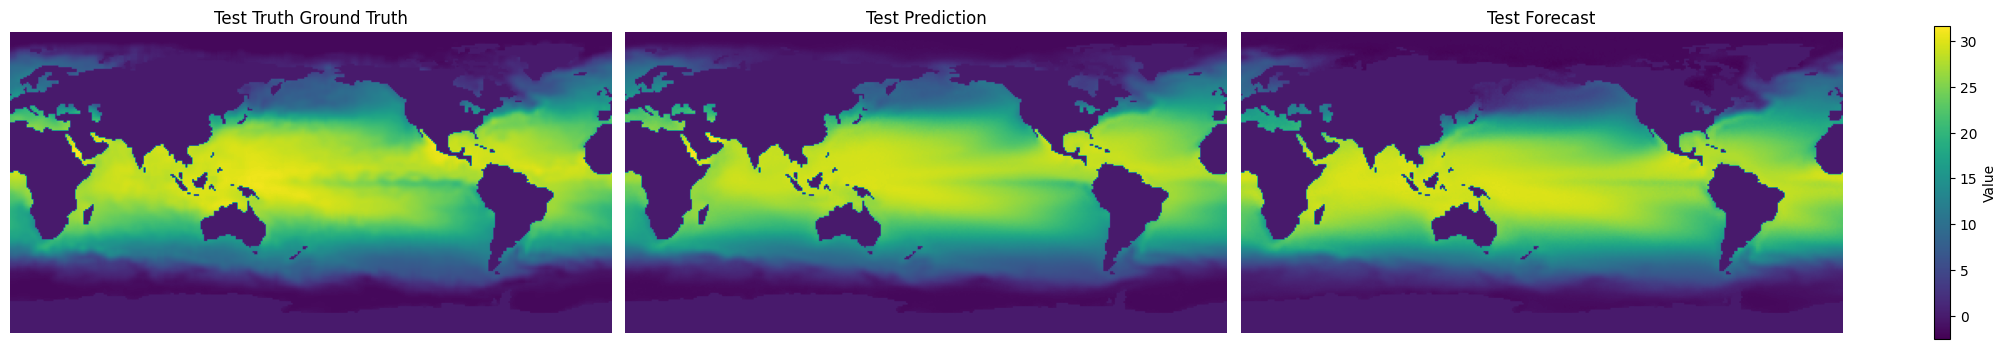

In [22]:
truth      = sst_data[-1]
prediction = test_prediction['SST'][t-1]
forecast   = test_forecast['SST'][t-1]

data   = [truth, prediction, forecast]
titles = ["Test Truth Ground Truth", "Test Prediction", "Test Forecast"]

vmin, vmax = np.min([d.min() for d in data]), np.max([d.max() for d in data])

fig, axes = plt.subplots(1, 3, figsize=(20, 4), constrained_layout=True)

for ax, d, title in zip(axes, data, titles):
    im = ax.imshow(d, vmin=vmin, vmax=vmax)
    ax.set(title=title)
    ax.axis("off")

fig.colorbar(im, ax=axes, label="Value", shrink=0.8)

#### Evaluate MSE on Ground Truth Data

In [23]:
# Train
t_train = len(manager.train_sensor_measurements)
train_Y = {'SST': sst_data[0:t_train]}
train_error = engine.evaluate(manager.train_sensor_measurements, train_Y)

# Val
t_val = len(manager.test_sensor_measurements)
val_Y = {'SST': sst_data[t_train:t_train+t_val]}
val_error = engine.evaluate(manager.val_sensor_measurements, val_Y)

# Test
t_test = len(manager.test_sensor_measurements)
test_Y = {'SST': sst_data[-t_test:]}
test_error = engine.evaluate(manager.test_sensor_measurements, test_Y)

print('---------- TRAIN ----------')
print(train_error)
print('\n---------- VAL   ----------')
print(val_error)
print('\n---------- TEST  ----------')
print(test_error)

---------- TRAIN ----------
              MSE      RMSE       MAE       R2
dataset                                       
SST      0.500042  0.707136  0.392109  0.44192

---------- VAL   ----------
             MSE      RMSE       MAE        R2
dataset                                       
SST      0.63041  0.793984  0.433035 -0.555411

---------- TEST  ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      0.923072  0.960766  0.544055 -0.280863
